<a href="https://colab.research.google.com/github/Ayush-mishra-0-0/ML/blob/main/12240340_DS201_ASSIGNMENT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <FONT color="pink">QUESTION-1</FONT>  
[Assignment link](https://cdn-uploads.piazza.com/paste/l6w1bx8r3hy6df/dabbbb9f77df1c39d2f1042eee434f6ba291910f93f8d3c7617a4c3dc9173a34/DS201_Assignment_2.pdf)  







### <FONT color="lightgreen">__PART-A__</FONT>
```
In question we have Customers arriving in a store is 5 per hour..
means λ=5
f(x)= (λ^x * e^-λ) /x!

```

In [1]:
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [2]:
def plot(arrivals_per_hour, num, ax,xlabel):
    sns.histplot(arrivals_per_hour, bins=20, kde=True, color='b', alpha=0.6, ax=ax)
    ax.set_xlabel(f'{xlabel}')
    ax.set_ylabel('Density')
    ax.set_title(f'Poisson Distribution\nof Customer Arrivals per Hour\n({num} samples)')
    ax.grid(True)

In [ ]:
mean_arrival_rate=5
num_samples = [10, 100, 1000, 10000, 100000, 1000000]


####  <a id="random-poisson-mult">`random_poisson_mult`</a>

In [ ]:
import random
import math
def next_double():
    return random.random()

def random_poisson_mult(lam, size):
    poisson_numbers = []
    for _ in range(size):
        X = 0
        prod = 1.0
        enlam = math.exp(-lam)
        while True:
            U = next_double()
            prod *= U

            if prod > enlam:
                X += 1
            else:
                poisson_numbers.append(X)
                break
    return poisson_numbers

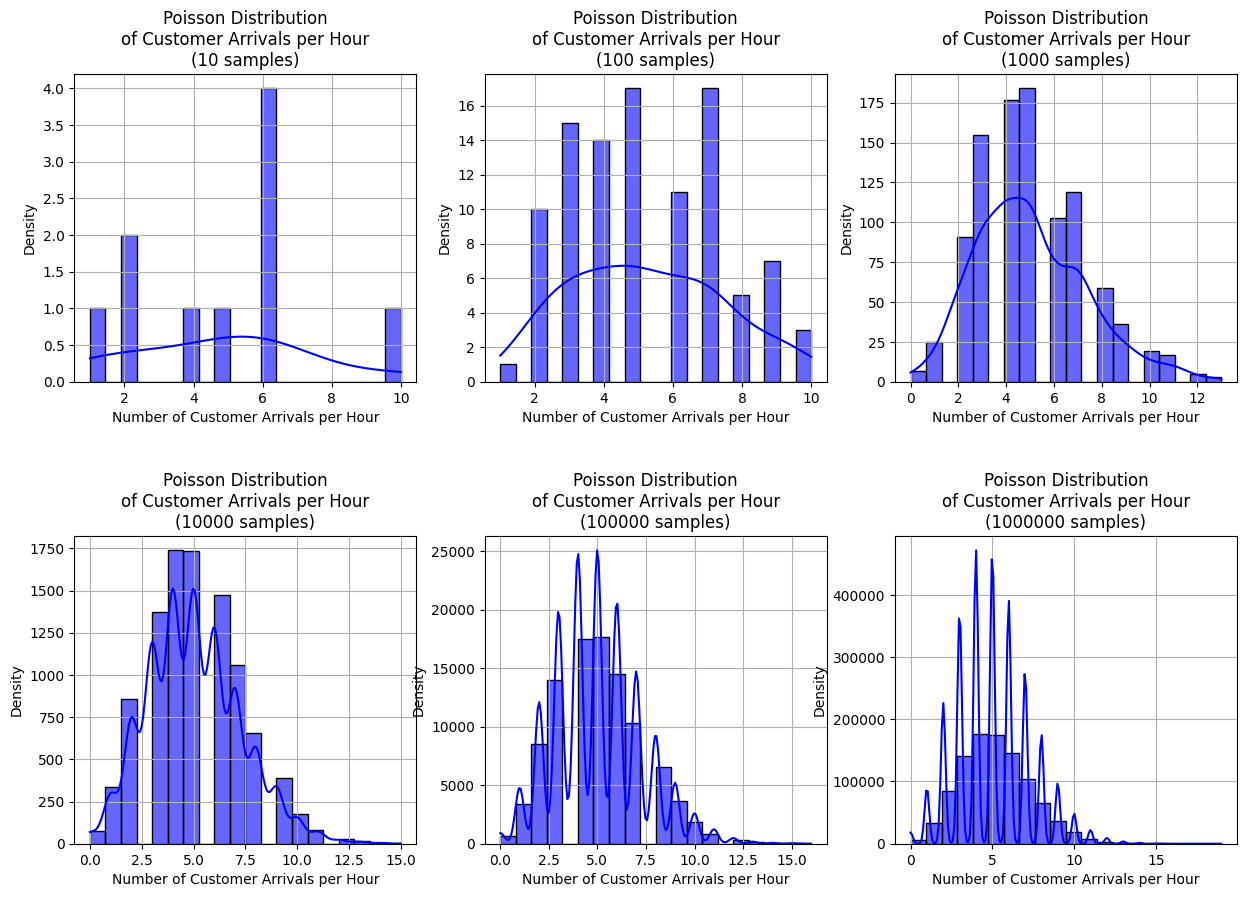

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), gridspec_kw={'hspace': 0.5})
axes = axes.flatten()
for i, num in enumerate(num_samples):
    arrivals_per_hour = random_poisson_mult(mean_arrival_rate, num)
    plot(arrivals_per_hour, num, axes[i],'NUMBER OF CUSTUMER ARRIVALS PER HOUR')

## <font color='pink'>PART-B</font>
So we have given to generate a bivariate dataset of gaussian distribution with the given mean and covariance matrix

```
Generate a bivariate dataset with two features (e.g., height and weight) assuming a multivariate
Gaussian distribution with given means µ1 = 65, µ2 = 150 and covariance matrix Σ [[25, 10], [10,
36]]. Visualize the data using a scatter plot in Python. Discuss the patterns in the plot and how
they correspond to the parameters of the multivariate Gaussian distribution.


####  __random_normal__

In [6]:
def random_normal(loc, std, bitgen_state):
    wi_double = [7.6971174701310497147e-17, 0.00012481047693294937242, ...]
    ki_double = [0x0000000000000000, 0x3ff0000000000000, ...]
    fi_double = [1.0, 0.455004033050794024546, ...]
    ziggurat_nor_inv_r = 7.6199995372608489922e-07
    ziggurat_nor_r = 3.442619855899
    bit_mask = 0xffffffffffffffff

    def next_uint32(state):
        return state.next_uint32(state.state)

    def next_uint64(state):
        return state.next_uint64(state.state)

    while True:
        # Generate a random 64-bit integer
        r = next_uint64(bitgen_state)

        # Extract index and sign from r
        idx = r & 0xff
        sign = r & 0x1

        # Extract absolute value of r
        r >>= 8
        rabs = (r >> 1) & bit_mask

        x = rabs * wi_double[idx]

        if sign & 0x1:
            x = -x

        if rabs < ki_double[idx]:
            return loc + std * x

        if idx == 0:
            while True:
                xx = -ziggurat_nor_inv_r * np.log1p(-next_double())
                yy = -np.log1p(-next_double())
                if yy + yy > xx * xx:
                    return loc + std * (-(ziggurat_nor_r + xx) if ((rabs >> 8) & 0x1) else (ziggurat_nor_r + xx))
        else:
            if ((fi_double[idx - 1] - fi_double[idx]) * next_double() + fi_double[idx]) < np.exp(-0.5 * x * x):
                return loc + std * x

In [ ]:
def plot_gauss():
        plt.figure(figsize=(8, 6))
        plt.scatter(data[:, 0], data[:, 1], alpha=0.6)
        plt.xlabel('Height')
        plt.ylabel('Weight')
        plt.title('Bivariate Dataset Generated from Multivariate Gaussian Distribution')
        plt.grid(True)
plt.show()

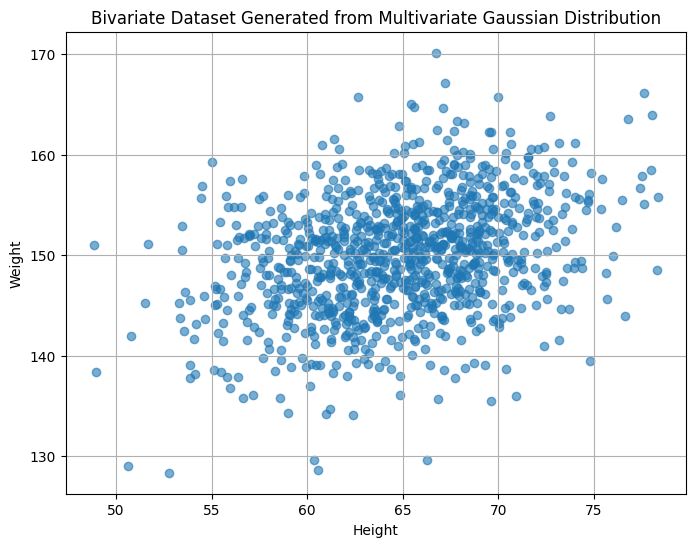

In [ ]:
mean = [65, 150]
covariance_matrix = [[25, 10], [10, 36]]
data = np.random.multivariate_normal(mean, covariance_matrix, size=1000)
plot_gauss()

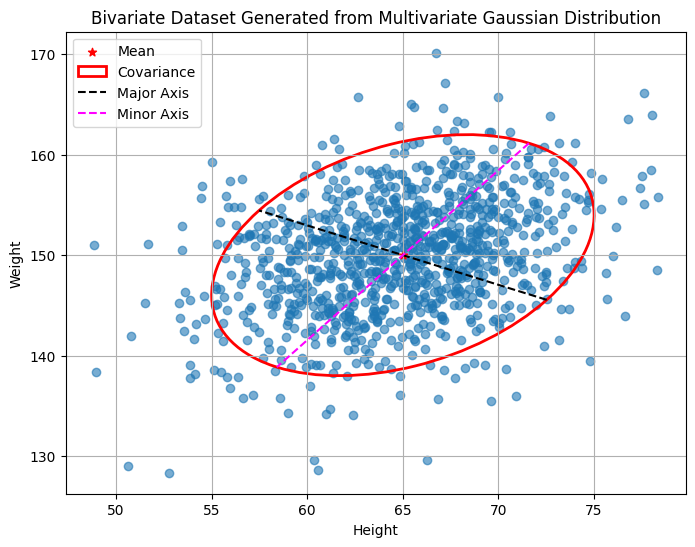

In [ ]:
plot_gauss()

plt.scatter(mean[0], mean[1], color='red', marker='*', label='Mean')

# Compute eigenvalues and eigenvectors of covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
# Calculate the angle of rotation
angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
# Create covariance ellipse
ellipse = Ellipse(xy=mean, width=4*np.sqrt(eigenvalues[0]), height=4*np.sqrt(eigenvalues[1]), angle=angle, edgecolor='red', lw=2, fill=False, label='Covariance')
plt.gca().add_patch(ellipse)
major_axis = 2 * np.sqrt(eigenvalues[0]) * eigenvectors[:, 0]  # Major axis
minor_axis = 2 * np.sqrt(eigenvalues[1]) * eigenvectors[:, 1]  # Minor axis
plt.plot([mean[0]-major_axis[0], mean[0] + major_axis[0]], [mean[1]-major_axis[1], mean[1] + major_axis[1]], color='black', linestyle='--', label='Major Axis')
plt.plot([mean[0]-minor_axis[0], mean[0] + minor_axis[0]], [mean[1]-minor_axis[1], mean[1] + minor_axis[1]], color='magenta', linestyle='--', label='Minor Axis')

# Show legend
plt.legend()
plt.show()

#### <font color="#98df8a">Scatter Plot Patterns:</font>

The scatter plot represents the distribution of data points in a two-dimensional space (height and weight in this case).
You'll notice that the data points are spread out across the plot, forming a cloud-like pattern.
The density of the data points varies across different regions of the plot.  

#### <font color="#98df8a">Mean Point:</font>

The red star symbolizes the mean point of the distribution, which in this case corresponds to the mean vector [65, 150].
It's positioned at the center of the plot since it represents the average height and weight of the generated data.  

#### <font color="#98df8a">Covariance Ellipse::</font>


The covariance ellipse represents the spread and orientation of the data distribution.
The size and shape of the ellipse are determined by the covariance matrix [[25, 10], [10, 36]].
The length of the major and minor axes of the ellipse reflects the variability of the data along the corresponding eigenvectors (principal axes) of the covariance matrix.
The orientation of the ellipse is determined by the eigenvectors of the covariance matrix.
The covariance ellipse helps visualize the direction and extent of correlation between the two variables (height and weight) in the dataset.

#### <font color="#98df8a">Axis of the Covariance Ellipse::</font>

The dashed lines represent the major and minor axes of the covariance ellipse.
The major axis corresponds to the direction of maximum variance in the data, while the minor axis corresponds to the direction of minimum variance.
These axes are aligned with the principal components of the data distribution, which are determined by the eigenvectors of the covariance matrix.
The length of these axes indicates the spread of the data along their respective directions.
Overall, the plot illustrates how the mean vector and covariance matrix govern the distribution of data points in a multivariate Gaussian distribution. The mean determines the central tendency, while the covariance matrix describes the spread, orientation, and correlation structure of the data. The patterns observed in the plot provide insights into the statistical characteristics of the generated dataset, allowing us to understand the relationships between the variables and their variability.

## <font color="#ff66cc">Part-C:</font>  
```
Generate a dataset for a univariate scenario (e.g., sales per day) and  
a bivariate scenario (e.g.,temperature and sales) using both Poisson and multivariate Gaussian distributions.
Create visualizations for each dataset using appropriate plots for each distribution (e.g., histogram for Poisson,
scatter plot for multivariate Gaussian). Compare and contrast the visualizations, explaining how
the characteristics of each distribution are reflected in the plots.


### <font color="#db7093"> First for univariate Poisson distribution </font>
<font color="lightgreen">Poisson Distribution</font>  
Poisson distribution is commonly used to model count data, such as the number of events occurring in a fixed interval of time or space. It is characterized by a single parameter, λ (lambda), which represents the average rate of occurrence of the events.

<font color="lightgreen">Visualization: Histogram</font>  
A histogram is a suitable plot for visualizing data generated from a Poisson distribution. It shows the frequency of occurrence of each value in the dataset.

<font color="lightgreen">Characteristics:</font>  
Shape: The histogram will typically have a right-skewed shape, with most values concentrated around the mean (λ).
Clumping: Data points tend to clump around the mean, with fewer observations as you move away from the mean.
Discrete Values: Since the Poisson distribution generates discrete values, you'll see clear breaks between adjacent bars in the histogram.  

Let the `_sales_per_day_` be 7

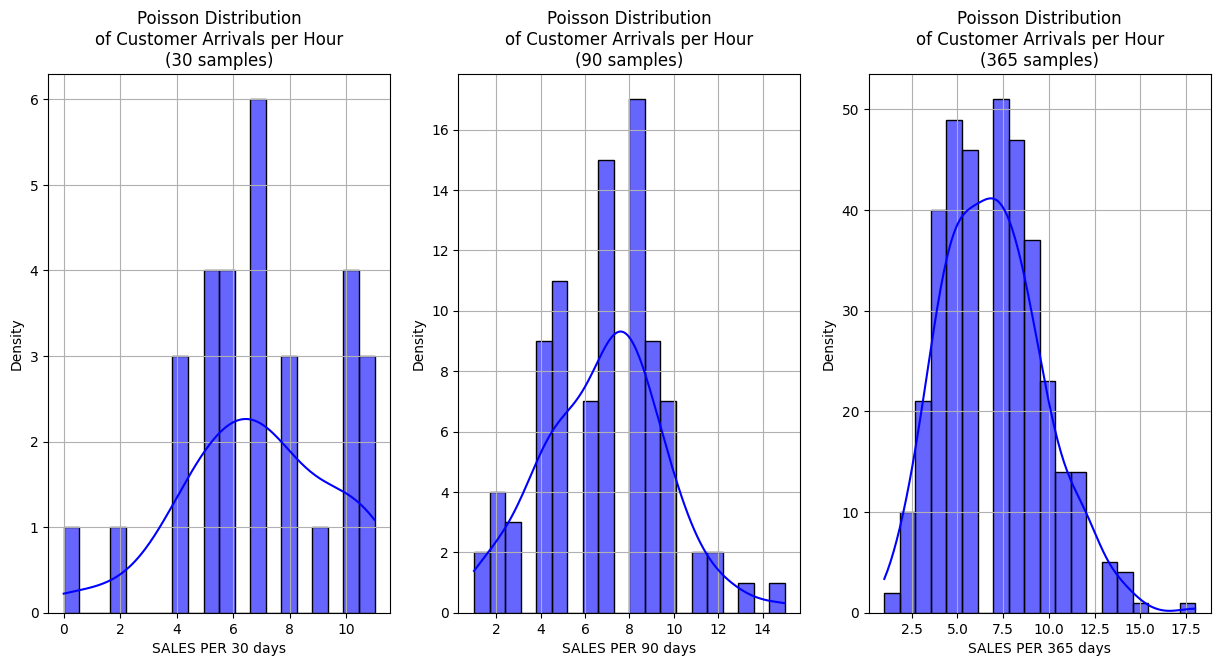

In [ ]:
sales_per_day=7
days=[30,90,365]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), gridspec_kw={'hspace': 0.5})
axes = axes.flatten()
for i, num in enumerate(days):
    x = random_poisson_mult(sales_per_day, num)
    plot(x, num, axes[i],f'SALES PER {num} days')

### <font color="db7093"> For multivariate Gaussian distributions </font>


<font color="lightgreen">Multivariate Gaussian Distribution</font>  
Multivariate Gaussian distribution, also known as multivariate normal distribution, is a generalization of the one-dimensional (univariate) Gaussian distribution to higher dimensions. It describes the joint distribution of multiple random variables that are normally distributed.

<font color="lightgreen">Visualization: Scatter Plot</font>  
A scatter plot is a suitable plot for visualizing data generated from a multivariate Gaussian distribution. Each point in the scatter plot represents a pair of values for the two variables being considered.

<font color="lightgreen">Characteristics</font>  
Shape: The scatter plot will show a clustering of points around a central tendency, resembling an ellipse if the variables are correlated.
Symmetry: Points tend to be symmetrically distributed around the mean in both dimensions if there is no correlation between variables.
Continuous Distribution: Unlike the Poisson distribution, which generates discrete values, the multivariate Gaussian distribution generates continuous values, resulting in a smooth distribution of points in the scatter plot.

```
let mean=[7,25] and covariance matrix be [[3,8],[8,10]]  


In [ ]:
mean=[7,25]
covariance_matrix=[[5,8],[8,10]]

<ipython-input-14-7b355f337da2>:1: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean, covariance_matrix, size=100)


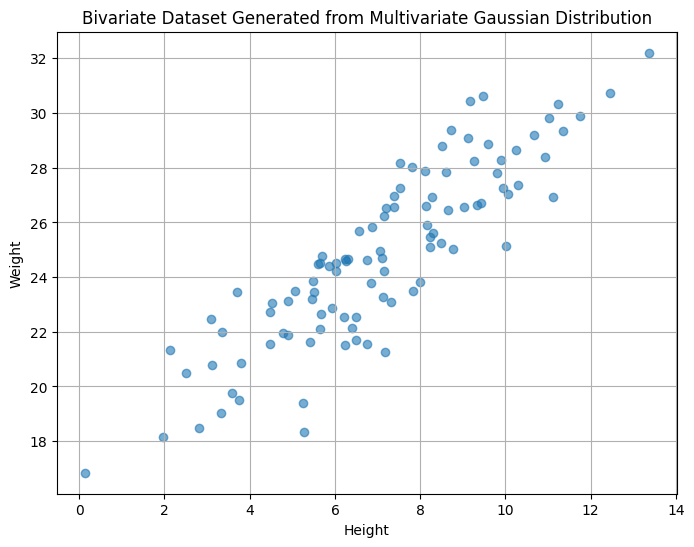

In [ ]:
data = np.random.multivariate_normal(mean, covariance_matrix, size=100)
plot_gauss()

#### <font color="#9467bd">__Comparison:__</font>

1. <font color="#d62728">__Shape__</font>: The Poisson histogram will have a right-skewed shape, while the scatter plot of the multivariate Gaussian distribution may exhibit an elliptical shape, especially if there is correlation between variables.
2. <font color="#d62728">__Discreteness vs. Continuity__</font>: The Poisson distribution generates discrete values, leading to distinct bars in the histogram, while the multivariate Gaussian distribution generates continuous values, resulting in a smooth scatter plot.
3. <font color="#d62728">__Central Tendency__</font>: Both distributions exhibit a central tendency, but in the Poisson distribution, it's reflected as a peak in the histogram, while in the multivariate Gaussian distribution, it's reflected as a cluster of points in the scatter plot.

By comparing these characteristics, we can see how the underlying properties of each distribution are reflected in the respective visualizations.






# <FONT color="pink">QUESTION-2</FONT>  

## <FONT color="lightgreen">__Part-A__</FONT>
```
Write a Python code to generate 1000 random numbers
from a Poisson distribution with a mean
of 3.
```
So __mean__ is 3 AND we have to generate 1000 random numbers from poisson distribution.  
<!-- <a id="random-poisson-mult"></a> -->
So we can use above made `random-poisson-mult`

In [ ]:
lm=3
size=1000

### Using my custum poison function

Text(0.5, 1.0, 'random numbers generated from Poisson Distribution')

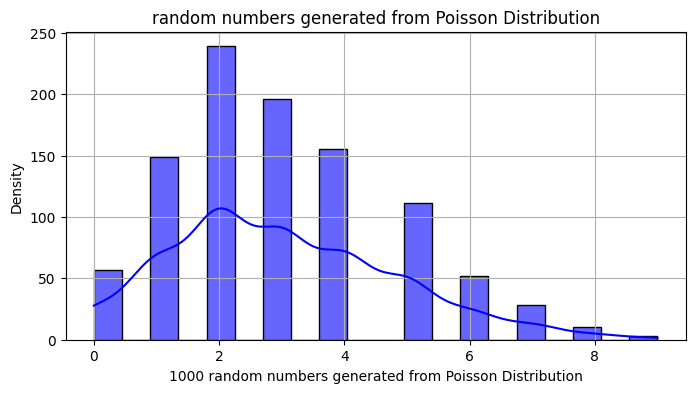

In [ ]:
random_nums = random_poisson_mult(lm, size)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot(random_nums, size, ax, "1000 random numbers generated from Poisson Distribution")
ax.set_title("random numbers generated from Poisson Distribution")

### Using built-in poisson function

Text(0.5, 1.0, 'random numbers generated from Poisson Distribution')

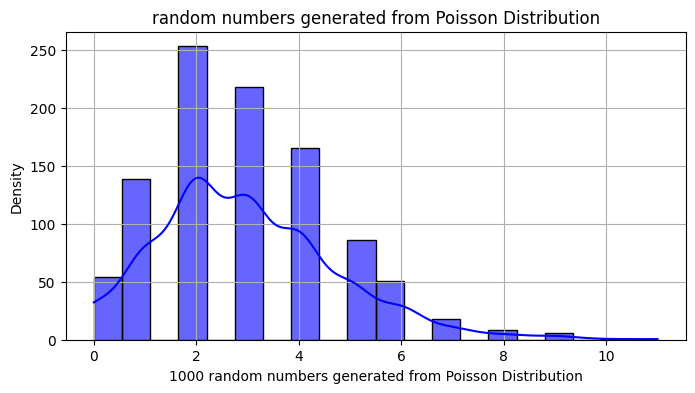

In [ ]:
random_builiIn_nums = np.random.poisson(lm, size)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot(random_builiIn_nums, size, ax, "1000 random numbers generated from Poisson Distribution")
ax.set_title("random numbers generated from Poisson Distribution")

## <FONT color="lightgreen">__Part-B__</FONT>
```
Transform the generated Poisson numbers to their squares and create a histogram to visualize
the distribution of squared values.


In [ ]:
def random_normal(mean, covariance_matrix, size):
    L = np.linalg.cholesky(covariance_matrix)
    z = np.random.normal(size=(size, 2))
    random_numbers = mean + np.dot(L, z.T).T
    return random_numbers

Text(0.5, 1.0, 'Square of random numbers generated from Poisson Distribution')

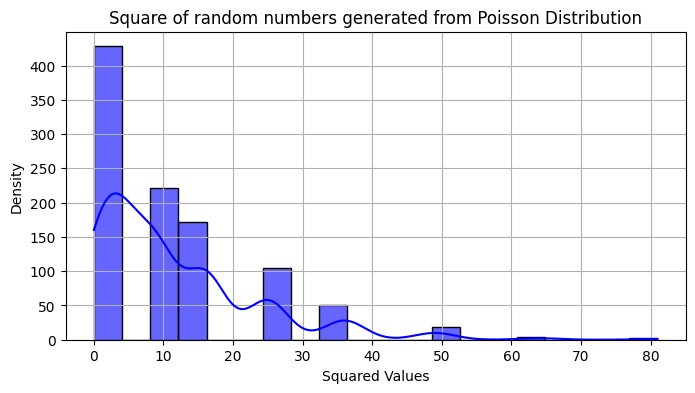

In [ ]:
squared_random_numbers= random_nums**2
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot(squared_random_numbers, size, ax, "Squared Values")
ax.set_title("Square of random numbers generated from Poisson Distribution")

Text(0.5, 1.0, 'Square of random numbers generated from Poisson Distribution')

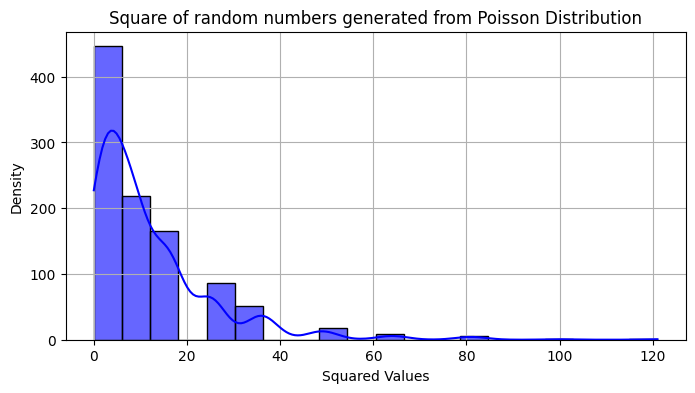

In [ ]:
squared_random_numbers= random_builiIn_nums**2
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot(squared_random_numbers, size, ax, "Squared Values")
ax.set_title("Square of random numbers generated from Poisson Distribution")

## <FONT color="lightgreen">__Part-C__</FONT>
```  
Now, write a Python code to generate 100 pairs of random numbers from
a bivariate Gaussian distribution with means µ1 = 2, µ2 = 3 and
covariance matrix Σ = [[1, 0.5], [0.5, 2]].
```

We have written the code to generate random numbers from bivariate gaussian distribution  
```  
def random_normal(loc, std, bitgen_state):
    wi_double = [7.6971174701310497147e-17, 0.00012481047693294937242, ...]
    ki_double = [0x0000000000000000, 0x3ff0000000000000, ...]
    fi_double = [1.0, 0.455004033050794024546, ...]
    ziggurat_nor_inv_r = 7.6199995372608489922e-07
    ziggurat_nor_r = 3.442619855899
    bit_mask = 0xffffffffffffffff

    def next_uint32(state):
        return state.next_uint32(state.state)

    def next_uint64(state):
        return state.next_uint64(state.state)

    while True:
        # Generate a random 64-bit integer
        r = next_uint64(bitgen_state)

        # Extract index and sign from r
        idx = r & 0xff
        sign = r & 0x1

        # Extract absolute value of r
        r >>= 8
        rabs = (r >> 1) & bit_mask

        x = rabs * wi_double[idx]

        if sign & 0x1:
            x = -x

        if rabs < ki_double[idx]:
            return loc + std * x

        if idx == 0:
            while True:
                xx = -ziggurat_nor_inv_r * np.log1p(-next_double())
                yy = -np.log1p(-next_double())
                if yy + yy > xx * xx:
                    return loc + std * (-(ziggurat_nor_r + xx) if ((rabs >> 8) & 0x1) else (ziggurat_nor_r + xx))
        else:
            if ((fi_double[idx - 1] - fi_double[idx]) * next_double() + fi_double[idx]) < np.exp(-0.5 * x * x):
                return loc + std * x
```

In [4]:
mean= [2,3]
cov= [[1,0.5],[0.5,2]]
size=100

In [7]:
def random_normal(mean, covariance_matrix, size):
    L = np.linalg.cholesky(covariance_matrix)
    z = np.random.normal(size=(size, 2))
    random_numbers = mean + np.dot(L, z.T).T
    return random_numbers

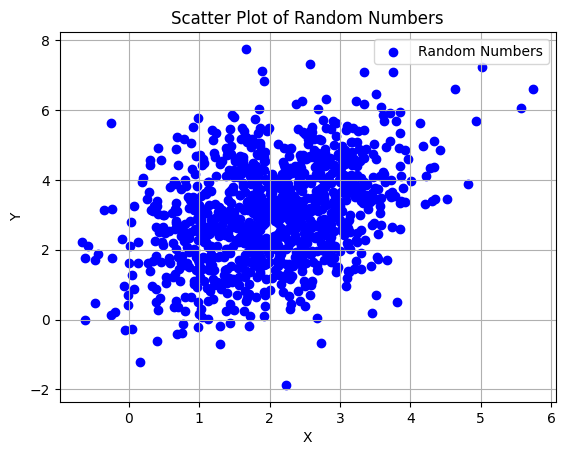

In [12]:
random_numbers = random_normal(mean, cov, 1000)
plt.scatter(random_numbers[:, 0], random_numbers[:, 1], marker='o', color='blue', label='Random Numbers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Random Numbers')
plt.legend()
plt.grid(True)
plt.show()

ϕ(x) = <span style="font-size: larger">
       <sup>1</sup>&frasl;<sub>
       <span style="font-size: smaller">
       2π√(|Σ₁ Σ₂|)
       </span>
       </sub>
       </span>
       exp{-0.5 [(x₁ - μ₁)² / Σ₁² + (x₂ - μ₂)² / Σ₂² - 2ρ (x₁ - μ₁)(x₂ - μ₂) / (Σ₁ Σ₂)]}


In [13]:
x= random_numbers[:,0]
y= random_numbers[:,1]
z=0
p = len(mean)
det_cov = np.linalg.det(cov)
inv_cov = np.linalg.inv(cov)
coefficient = 1 / (2 * np.pi * np.sqrt(det_cov))
exponent = -0.5 * ((x - mean[0])**2 * inv_cov[0, 0] +   (y - mean[1])**2 * inv_cov[1, 1] + 2 * (x - mean[0]) * (y - mean[1]) * inv_cov[0, 1])
z = coefficient * np.exp(exponent)


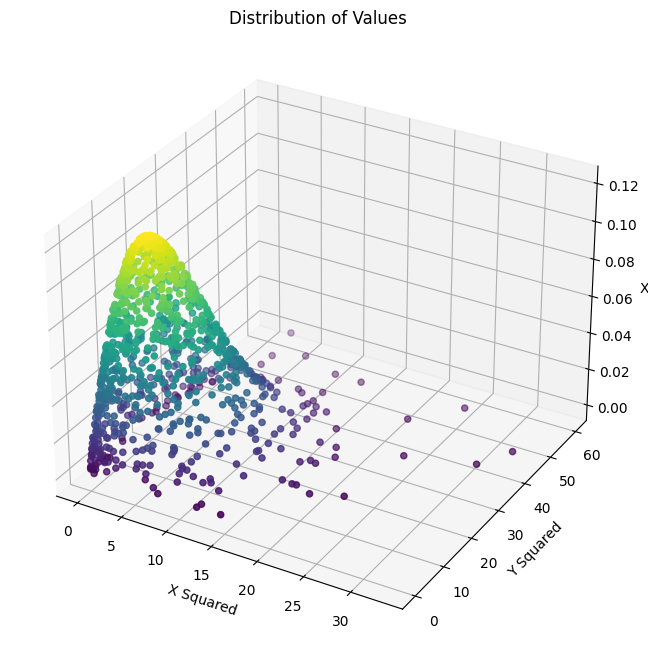

In [15]:
fig = plt.figure(figsize = (8 , 8))
ax = fig.add_subplot(111 ,projection = "3d")
ax.scatter3D(x*x, y*y, z, c=z, cmap='viridis',marker='o')

# Set labels and title
ax.set_xlabel('X Squared')
ax.set_ylabel('Y Squared')
ax.set_zlabel('XY')
ax.set_title('Distribution of Values')

# Show the plot
plt.show()

In [16]:
squared_values = random_numbers ** 2
mean_vector_transformed = np.mean(squared_values, axis=0)
covariance_matrix_transformed = np.cov(squared_values.T)


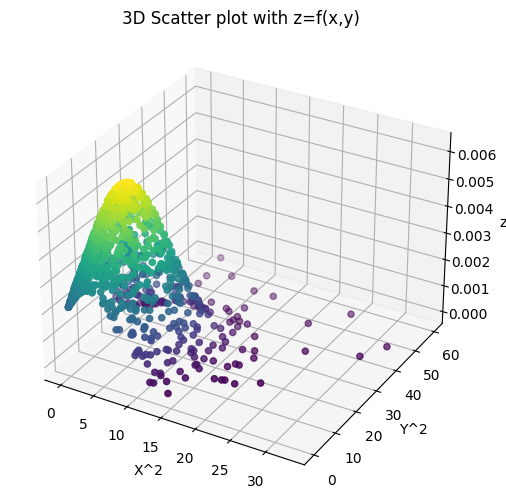

In [18]:
mue1=mean_vector_transformed [0]
mue2=mean_vector_transformed [1]
sigma1=covariance_matrix_transformed[0,0]**0.5
sigma2=covariance_matrix_transformed[1,1]**0.5
rho=covariance_matrix_transformed[0,1]/(sigma1*sigma2)

# z=pdf(x^2,y^2)
def q(x, y):
    z = 1 / (2 * np.pi * sigma1 * sigma2 * ((1 - rho) ** 2) ** 0.5) * \
        np.exp(-1 / (2 * (1 - rho ** 2)) * (((y - mue2) / sigma2) ** 2 + ((x - mue1) / sigma1) ** 2 - 2 * rho * ((x - mue1) / sigma1) * (y - mue2) / sigma2))
    return z

# Calculating Z for tranformed data
z_values = q(squared_values[:, 0], squared_values[:, 1])


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(squared_values[:, 0], squared_values[:, 1], z_values, c=z_values, cmap='viridis')

ax.set_xlabel("X^2")
ax.set_ylabel("Y^2")
ax.set_zlabel("z")
ax.set_title("3D Scatter plot with z=f(x,y)")

plt.show()

## <FONT color="lightgreen">__Part-D__</FONT>
```    
Transform each pair of Gaussian numbers to their squares (both elements of the pair) and create
a 3D scatter plot to visualize the distribution of squared values.
```

In [19]:
import pandas as pd
import plotly.express as px

In [ ]:
random_numbers_squared= random_numbers**2

In [20]:
df = pd.DataFrame({'Squared Value 1': squared_values[:, 0], 'Squared Value 2': squared_values[:, 1], 'Frequency': z_values})

fig = px.scatter_3d(df, x='Squared Value 1', y='Squared Value 2', z='Frequency', opacity=0.7, title='Distribution of Squared Values')
fig.show()

## <FONT color="lightgreen">__Part-E__</FONT>
Comparison of Histograms (Poisson Distribution) and Scatter Plot (Multivariate Gaussian Distribution) for Squared Values:

Histogram (Poisson Distribution):

Represents the frequency of occurrence of squared values from the Poisson distribution.
Can exhibit right-skewness, particularly for higher values of the Poisson parameter λ.
Displays the distribution in a one-dimensional manner, showing the spread and shape of the squared values.
Scatter Plot (Multivariate Gaussian Distribution):

Represents the distribution of squared values from the multivariate Gaussian distribution in a two-dimensional space.
The shape and spread of points are determined by the mean and covariance matrix of the original distribution.
Provides insights into patterns or clusters in the distribution, depending on the correlation structure specified by the covariance matrix.
Shows the relationship between squared values of two variables, enabling visualization of correlations.

## <FONT color="lightgreen">__Part-F__</FONT>
1. Comparison reveals differences in the distribution characteristics between the two distributions.  

2. Histogram may show a unimodal or skewed distribution, whereas the scatter plot may exhibit patterns or clusters.  

3. Right-skewness in the histogram suggests that the transformation of Poisson distributed data to squared values results in a spread of values, particularly for higher λ.  

4. Scatter plot insights can help understand how the transformation affects the correlation structure and spread of the data.  

5. Visualizing the distributions of squared values provides valuable insights for statistical analysis and modeling, informing decisions on data transformation and interpretation.